# Project

## Data Preprocessing

Importing:

In [1]:
import pandas as pd

gdp_file_path = '/content/GDP.csv'
land_classification_file_path = '/content/ZONAL_UTF8.csv'

# Import the GDP per capita data
gdp_data = pd.read_csv(gdp_file_path)

# Import the land classification data
land_data = pd.read_csv(land_classification_file_path)

# Display the first few rows of each dataset to confirm import
print("GDP Data Sample:")
print(gdp_data.head())

print("\nLand Classification Data Sample:")
print(land_data.head())


GDP Data Sample:
                   DATAFLOW        LAST UPDATE freq     unit    geo  \
0  ESTAT:NAMA_10R_3GDP(1.0)  20/02/24 11:00:00    A  EUR_HAB  AL011   
1  ESTAT:NAMA_10R_3GDP(1.0)  20/02/24 11:00:00    A  EUR_HAB  AL012   
2  ESTAT:NAMA_10R_3GDP(1.0)  20/02/24 11:00:00    A  EUR_HAB  AL013   
3  ESTAT:NAMA_10R_3GDP(1.0)  20/02/24 11:00:00    A  EUR_HAB  AL014   
4  ESTAT:NAMA_10R_3GDP(1.0)  20/02/24 11:00:00    A  EUR_HAB  AL015   

   TIME_PERIOD  OBS_VALUE OBS_FLAG  
0         2018       3400      NaN  
1         2018       4400      NaN  
2         2018       2800      NaN  
3         2018       3200      NaN  
4         2018       3200      NaN  

Land Classification Data Sample:
      id             na  LT_NODATA  LT_1   LT_2  LT_3  LT_4  LT_5  LT_6  LT_7  \
0  ES704  Fuerteventura          0   537   3922   572   122    32   336   283   
1  ES708      Lanzarote          0  1109   2821   488     0    15   198   352   
2  ES640        Melilla          6   311    111   189    

Merging data:

In [2]:
# Extract the first 4 characters of the 'geo' column in GDP data as NUTS2 codes
gdp_data['id'] = gdp_data['geo']

# Merge datasets on the NUTS2 region code
merged_data = pd.merge(
    land_data,
    gdp_data,
    how='inner',  # Use 'inner' join to keep only matching NUTS2 regions
    on='id'
)

# Display the merged dataset
print("Merged Data Sample:")
print(merged_data.head())

# Save the merged dataset to a file
merged_data.to_csv('DataF.csv', index=False)

Merged Data Sample:
      id             na  LT_NODATA  LT_1   LT_2  LT_3  LT_4  LT_5  LT_6  LT_7  \
0  ES704  Fuerteventura          0   537   3922   572   122    32   336   283   
1  ES708      Lanzarote          0  1109   2821   488     0    15   198   352   
2  ES640        Melilla          6   311    111   189     0    13    51     0   
3  ES630          Ceuta         17   161    229   229     0    13     0     6   
4  ES612          Cádiz          0  7768  14970  5928   797   488   525  1812   

   ...  LT_44  LT_48                  DATAFLOW        LAST UPDATE  freq  \
0  ...   1345      0  ESTAT:NAMA_10R_3GDP(1.0)  20/02/24 11:00:00     A   
1  ...   1148      0  ESTAT:NAMA_10R_3GDP(1.0)  20/02/24 11:00:00     A   
2  ...     36      0  ESTAT:NAMA_10R_3GDP(1.0)  20/02/24 11:00:00     A   
3  ...    120      0  ESTAT:NAMA_10R_3GDP(1.0)  20/02/24 11:00:00     A   
4  ...   3086      0  ESTAT:NAMA_10R_3GDP(1.0)  20/02/24 11:00:00     A   

      unit    geo  TIME_PERIOD  OBS_VALUE 

In [3]:
data = merged_data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1309 non-null   object
 1   na           1309 non-null   object
 2   LT_NODATA    1309 non-null   int64 
 3   LT_1         1309 non-null   int64 
 4   LT_2         1309 non-null   int64 
 5   LT_3         1309 non-null   int64 
 6   LT_4         1309 non-null   int64 
 7   LT_5         1309 non-null   int64 
 8   LT_6         1309 non-null   int64 
 9   LT_7         1309 non-null   int64 
 10  LT_8         1309 non-null   int64 
 11  LT_9         1309 non-null   int64 
 12  LT_10        1309 non-null   int64 
 13  LT_11        1309 non-null   int64 
 14  LT_12        1309 non-null   int64 
 15  LT_13        1309 non-null   int64 
 16  LT_14        1309 non-null   int64 
 17  LT_15        1309 non-null   int64 
 18  LT_16        1309 non-null   int64 
 19  LT_17        1309 non-null 

In [5]:
data.describe()

,LT_NODATA,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,...,LT_38,LT_39,LT_40,LT_41,LT_42,LT_43,LT_44,LT_48,TIME_PERIOD,OBS_VALUE
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.00000,1309.000000,1309.0,1309.000000
mean,64.689076,571.613445,11697.841864,2207.069519,298.647823,62.525592,231.989305,566.132162,88.246753,138.491215,...,54.433155,77.808251,919.961039,9569.294882,252.432391,64.417112,1200.13751,0.623377,2018.0,27673.109244
std,791.420742,1710.736043,10742.988794,2385.362926,509.966635,263.574059,376.141439,1092.263742,257.780736,580.979377,...,403.866573,576.995073,2446.784369,44207.740129,2332.010369,438.602103,6685.59235,22.553832,0.0,18612.126391
min,0.000000,0.000000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2018.0,2500.000000
25%,0.000000,14.000000,4342.000000,792.000000,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.00000,0.000000,2018.0,13600.000000
50%,0.000000,117.000000,8192.000000,1460.000000,90.000000,0.000000,75.000000,237.000000,25.000000,0.000000,...,0.000000,0.000000,127.000000,752.000000,0.000000,0.000000,0.00000,0.000000,2018.0,26600.000000
75%,0.000000,369.000000,15253.000000,2792.000000,388.000000,23.000000,308.000000,640.000000,80.000000,91.000000,...,0.000000,0.000000,931.000000,3223.000000,0.000000,0.000000,0.00000,0.000000,2018.0,35800.000000
max,14578.000000,29026.000000,76033.000000,22373.000000,7196.000000,6068.000000,4578.000000,14053.000000,5201.000000,11495.000000,...,8358.000000,9362.000000,44844.000000,656684.000000,51950.000000,8535.000000,121075.00000,816.000000,2018.0,184200.000000


Checking Missing Values:

In [6]:
data.isnull().sum()

,0
id,0
na,0
LT_NODATA,0
LT_1,0
LT_2,0
LT_3,0
LT_4,0
LT_5,0
LT_6,0
LT_7,0


Too many missing values and not relevant.

In [7]:
data.drop(["OBS_FLAG"], axis=1, inplace=True)

Also not relevant as very rarely occurring:

In [8]:
data.drop(["LT_NODATA"], axis=1, inplace=True)

In [9]:
data.isnull().sum()

,0
id,0
na,0
LT_1,0
LT_2,0
LT_3,0
LT_4,0
LT_5,0
LT_6,0
LT_7,0
LT_8,0


No missing values now.

Renaming Features

In [10]:
data.rename(columns={
    'LT_1': 'LT_Urban',
    'LT_2': 'LT_DisUrban',
    'LT_3': 'LT_Industrial',
    'LT_4': 'LT_Transport',
    'LT_5': 'LT_Ports',
    'LT_6': 'LT_Airports',
    'LT_9': 'LT_Construction',
    'LT_10': 'LT_GreenUrban',
    'LT_11': 'LT_SportsLeisure',
    'LT_20': 'LT_ComplexCultivation',
    'LT_27': 'LT_Moors',
    'LT_29': 'LT_Schrubs',
}, inplace=True)

Calculating proportions:

In [11]:
# Calculate total area for each region
data['total_area'] = data[[col for col in data.columns if col.startswith('LT_')]].sum(axis=1)

# Calculate proportions for each LT_ column
for col in [col for col in data.columns if col.startswith('LT_')]:
    data[f'{col}_proportion'] = data[col] / data['total_area']

In [12]:
print(data.head())
print(data.info())

      id             na  LT_Urban  LT_DisUrban  LT_Industrial  LT_Transport  \
0  ES704  Fuerteventura       537         3922            572           122   
1  ES708      Lanzarote      1109         2821            488             0   
2  ES640        Melilla       311          111            189             0   
3  ES630          Ceuta       161          229            229             0   
4  ES612          Cádiz      7768        14970           5928           797   

   LT_Ports  LT_Airports  LT_7  LT_8  ...  LT_36_proportion  LT_37_proportion  \
0        32          336   283    27  ...               0.0          0.000000   
1        15          198   352    42  ...               0.0          0.000000   
2        13           51     0     0  ...               0.0          0.000000   
3        13            0     6     0  ...               0.0          0.000000   
4       488          525  1812   129  ...               0.0          0.008583   

   LT_38_proportion  LT_39_proportion 

In [13]:
print(list(data.columns))

['id', 'na', 'LT_Urban', 'LT_DisUrban', 'LT_Industrial', 'LT_Transport', 'LT_Ports', 'LT_Airports', 'LT_7', 'LT_8', 'LT_Construction', 'LT_GreenUrban', 'LT_SportsLeisure', 'LT_12', 'LT_13', 'LT_14', 'LT_15', 'LT_16', 'LT_17', 'LT_18', 'LT_19', 'LT_ComplexCultivation', 'LT_21', 'LT_22', 'LT_23', 'LT_24', 'LT_25', 'LT_26', 'LT_Moors', 'LT_28', 'LT_Schrubs', 'LT_30', 'LT_31', 'LT_32', 'LT_33', 'LT_34', 'LT_35', 'LT_36', 'LT_37', 'LT_38', 'LT_39', 'LT_40', 'LT_41', 'LT_42', 'LT_43', 'LT_44', 'LT_48', 'DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'geo', 'TIME_PERIOD', 'OBS_VALUE', 'total_area', 'LT_Urban_proportion', 'LT_DisUrban_proportion', 'LT_Industrial_proportion', 'LT_Transport_proportion', 'LT_Ports_proportion', 'LT_Airports_proportion', 'LT_7_proportion', 'LT_8_proportion', 'LT_Construction_proportion', 'LT_GreenUrban_proportion', 'LT_SportsLeisure_proportion', 'LT_12_proportion', 'LT_13_proportion', 'LT_14_proportion', 'LT_15_proportion', 'LT_16_proportion', 'LT_17_proportion', 'LT_18

Dropped irrelevent columns and land classification absolute values.

In [14]:
data.drop(['id', 'na', 'LT_Urban', 'LT_DisUrban', 'LT_Industrial', 'LT_Transport', 'LT_Ports', 'LT_Airports', 'LT_7', 'LT_8', 'LT_Construction', 'LT_GreenUrban', 'LT_SportsLeisure', 'LT_12', 'LT_13', 'LT_14', 'LT_15', 'LT_16', 'LT_17', 'LT_18', 'LT_19', 'LT_ComplexCultivation', 'LT_21', 'LT_22', 'LT_23', 'LT_24', 'LT_25', 'LT_26', 'LT_Moors', 'LT_28', 'LT_Schrubs', 'LT_30', 'LT_31', 'LT_32', 'LT_33', 'LT_34', 'LT_35', 'LT_36', 'LT_37', 'LT_38', 'LT_39', 'LT_40', 'LT_41', 'LT_42', 'LT_43', 'LT_44', 'LT_48', 'DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'geo', 'TIME_PERIOD',], axis=1, inplace=True)

In [15]:
print(list(data.columns))

['OBS_VALUE', 'total_area', 'LT_Urban_proportion', 'LT_DisUrban_proportion', 'LT_Industrial_proportion', 'LT_Transport_proportion', 'LT_Ports_proportion', 'LT_Airports_proportion', 'LT_7_proportion', 'LT_8_proportion', 'LT_Construction_proportion', 'LT_GreenUrban_proportion', 'LT_SportsLeisure_proportion', 'LT_12_proportion', 'LT_13_proportion', 'LT_14_proportion', 'LT_15_proportion', 'LT_16_proportion', 'LT_17_proportion', 'LT_18_proportion', 'LT_19_proportion', 'LT_ComplexCultivation_proportion', 'LT_21_proportion', 'LT_22_proportion', 'LT_23_proportion', 'LT_24_proportion', 'LT_25_proportion', 'LT_26_proportion', 'LT_Moors_proportion', 'LT_28_proportion', 'LT_Schrubs_proportion', 'LT_30_proportion', 'LT_31_proportion', 'LT_32_proportion', 'LT_33_proportion', 'LT_34_proportion', 'LT_35_proportion', 'LT_36_proportion', 'LT_37_proportion', 'LT_38_proportion', 'LT_39_proportion', 'LT_40_proportion', 'LT_41_proportion', 'LT_42_proportion', 'LT_43_proportion', 'LT_44_proportion', 'LT_48_p

Encoding country code with OH encoding:

Standardizing:

In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Normalize the 'total_area' column
data['total_area_standardized'] = scaler.fit_transform(data[['total_area']])

# Drop the original 'total_area' column if no longer needed
data = data.drop(columns=['total_area'])

# Verify the transformation
print("Standardized 'total_area':")
print(data['total_area_standardized'].describe())


Standardized 'total_area':
count    1.309000e+03
mean     2.171254e-17
std      1.000382e+00
min     -6.034743e-01
25%     -4.794549e-01
50%     -2.792390e-01
75%      2.101949e-01
max      1.497349e+01
Name: total_area_standardized, dtype: float64


In [17]:
# Drop rows with any missing values
data_clean = data.dropna()

# Verify the shape of the cleaned dataset
print(f"Original dataset shape: {data.shape}")
print(f"Cleaned dataset shape: {data_clean.shape}")

Original dataset shape: (1309, 47)
Cleaned dataset shape: (1309, 47)


In [18]:
data = data_clean

In [19]:
data.describe()

,OBS_VALUE,LT_Urban_proportion,LT_DisUrban_proportion,LT_Industrial_proportion,LT_Transport_proportion,LT_Ports_proportion,LT_Airports_proportion,LT_7_proportion,LT_8_proportion,LT_Construction_proportion,...,LT_37_proportion,LT_38_proportion,LT_39_proportion,LT_40_proportion,LT_41_proportion,LT_42_proportion,LT_43_proportion,LT_44_proportion,LT_48_proportion,total_area_standardized
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1.309000e+03,1.309000e+03
mean,27673.109244,0.006284,0.073426,0.018112,0.001760,0.000751,0.001357,0.001779,0.000457,0.000463,...,0.000768,0.000126,0.000274,0.003373,0.012958,0.000580,0.000434,0.002297,5.122939e-07,2.171254e-17
std,18612.126391,0.032958,0.088099,0.030087,0.003936,0.003920,0.004232,0.004709,0.001250,0.002098,...,0.004128,0.001088,0.003063,0.007774,0.032467,0.004316,0.004568,0.007678,1.853485e-05,1.000382e+00
min,2500.000000,0.000000,0.000865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-6.034743e-01
25%,13600.000000,0.000013,0.021622,0.003069,0.000000,0.000000,0.000000,0.000352,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000961,0.000000,0.000000,0.000000,0.000000e+00,-4.794549e-01
50%,26600.000000,0.000557,0.044682,0.006890,0.000402,0.000000,0.000274,0.000914,0.000041,0.000000,...,0.000000,0.000000,0.000000,0.000491,0.003628,0.000000,0.000000,0.000000,0.000000e+00,-2.792390e-01
75%,35800.000000,0.002305,0.079714,0.016081,0.001547,0.000051,0.000963,0.001841,0.000342,0.000296,...,0.000000,0.000000,0.000000,0.003598,0.010142,0.000000,0.000000,0.000000,0.000000e+00,2.101949e-01
max,184200.000000,0.668956,0.572199,0.198419,0.049787,0.057312,0.059612,0.117403,0.012183,0.056138,...,0.095232,0.030138,0.101471,0.123324,0.404174,0.080671,0.128558,0.113559,6.705927e-04,1.497349e+01


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OBS_VALUE                         1309 non-null   int64  
 1   LT_Urban_proportion               1309 non-null   float64
 2   LT_DisUrban_proportion            1309 non-null   float64
 3   LT_Industrial_proportion          1309 non-null   float64
 4   LT_Transport_proportion           1309 non-null   float64
 5   LT_Ports_proportion               1309 non-null   float64
 6   LT_Airports_proportion            1309 non-null   float64
 7   LT_7_proportion                   1309 non-null   float64
 8   LT_8_proportion                   1309 non-null   float64
 9   LT_Construction_proportion        1309 non-null   float64
 10  LT_GreenUrban_proportion          1309 non-null   float64
 11  LT_SportsLeisure_proportion       1309 non-null   float64
 12  LT_12_

##Classification:

In [21]:
cl_data = data.copy()
gdp_values = cl_data['OBS_VALUE']
# Equal-frequency binning into 3 categories
cl_data['GDP_Category'] = pd.qcut(gdp_values, q=3, labels=[ 'Low', 'Medium', 'High'])

# Check the new column
print(cl_data[['OBS_VALUE', 'GDP_Category']].head())

   OBS_VALUE GDP_Category
0      21300       Medium
1      23900       Medium
2      18700          Low
3      20300       Medium
4      17800          Low


In [22]:
cl_data.drop(["OBS_VALUE"], axis=1, inplace=True)

In [23]:
from sklearn.model_selection import train_test_split

X = cl_data.drop(["GDP_Category"], axis=1)
y = cl_data['GDP_Category']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.5687022900763359
Classification Report:
               precision    recall  f1-score   support

        High       0.61      0.55      0.58        93
         Low       0.61      0.73      0.67        79
      Medium       0.48      0.44      0.46        90

    accuracy                           0.57       262
   macro avg       0.57      0.58      0.57       262
weighted avg       0.57      0.57      0.56       262

Confusion Matrix:
 [[51 10 32]
 [ 9 58 12]
 [23 27 40]]


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest Classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.767175572519084
Classification Report:
               precision    recall  f1-score   support

        High       0.76      0.77      0.77        93
         Low       0.84      0.89      0.86        79
      Medium       0.70      0.66      0.68        90

    accuracy                           0.77       262
   macro avg       0.77      0.77      0.77       262
weighted avg       0.76      0.77      0.77       262

Confusion Matrix:
 [[72  1 20]
 [ 4 70  5]
 [19 12 59]]


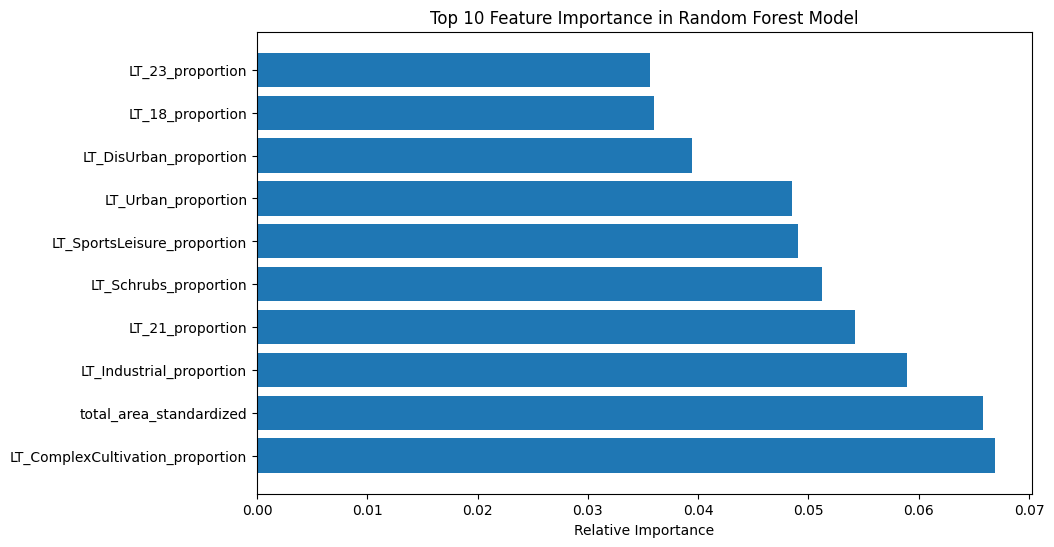

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Select top 10 most important features
top_n = 10
indices_top = indices[:top_n]
importances_top = importances[indices_top]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importance in Random Forest Model")
plt.barh(range(top_n), importances_top, align="center")
plt.yticks(range(top_n), [X_train.columns[i] for i in indices_top])
plt.xlabel("Relative Importance")
plt.show()


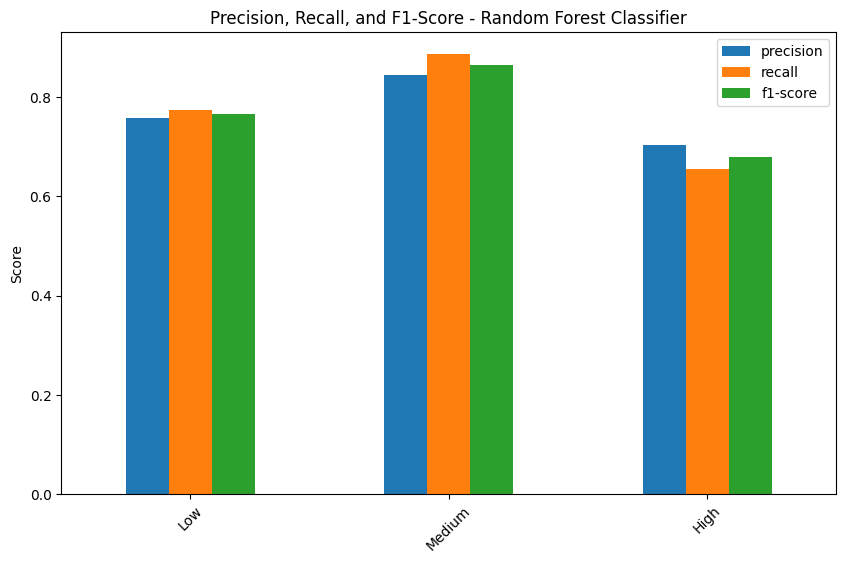

In [27]:
from sklearn.metrics import classification_report
bin_labels = [ 'Low', 'Medium', 'High']
# Generate classification report for Random Forest
report_rf = classification_report(y_test, y_pred_rf, target_names=bin_labels, output_dict=True)

# Convert the report into a DataFrame
import pandas as pd
report_df = pd.DataFrame(report_rf).transpose()

# Plot Precision, Recall, and F1-Score
report_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, and F1-Score - Random Forest Classifier")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


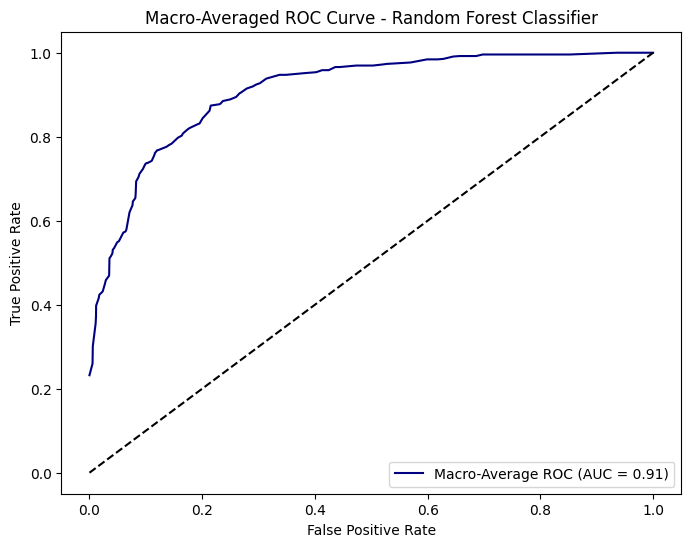

In [28]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_prob_rf are defined

# Ensure y_test is one-hot encoded if it's not already
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get predicted probabilities for each class using Random Forest
y_pred_prob_rf = rf.predict_proba(X_test) # This line has been added

# Compute macro-average ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]  # Get the number of classes

for i in range(n_classes):
    # Check if there are positive samples for this class
    if np.any(y_test_bin[:, i] == 1):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_rf[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    else:
        print(f"Warning: No positive samples for class {i}. ROC curve not calculated.")

# Aggregate all false positive rates
# Ensure roc_auc is not empty before concatenating
if roc_auc:
    all_fpr = np.unique(np.concatenate([fpr[i] for i in roc_auc.keys()]))

    # Interpolate all ROC curves
    mean_tpr = np.zeros_like(all_fpr)
    for i in roc_auc.keys():
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= len(roc_auc)

    # Compute macro-average AUC
    macro_auc = auc(all_fpr, mean_tpr)

    # Plot macro-average ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(all_fpr, mean_tpr, color='navy', label=f"Macro-Average ROC (AUC = {macro_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.title("Macro-Averaged ROC Curve - Random Forest Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
else:
    print("Error: No ROC curves could be calculated. Check your data and model predictions.")

### SVC

In [29]:
from sklearn.svm import SVC

# Initialize and train Support Vector Classifier model
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc.predict(X_test)

# Evaluate performance
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))


SVC Accuracy: 0.6030534351145038
Classification Report:
               precision    recall  f1-score   support

        High       0.65      0.65      0.65        93
         Low       0.60      0.87      0.71        79
      Medium       0.53      0.32      0.40        90

    accuracy                           0.60       262
   macro avg       0.59      0.61      0.59       262
weighted avg       0.59      0.60      0.58       262

Confusion Matrix:
 [[60 12 21]
 [ 5 69  5]
 [27 34 29]]


SVC Accuracy (PCA): 0.42748091603053434
Classification Report (PCA):
               precision    recall  f1-score   support

        High       0.45      0.59      0.51        93
         Low       0.41      0.42      0.41        79
      Medium       0.41      0.27      0.32        90

    accuracy                           0.43       262
   macro avg       0.42      0.43      0.42       262
weighted avg       0.42      0.43      0.42       262

Confusion Matrix (PCA):
 [[55 17 21]
 [32 33 14]
 [35 31 24]]


<ipython-input-30-71ae32a2cf08>:37: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if types.is_categorical_dtype(y_train):
<ipython-input-30-71ae32a2cf08>:45: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if types.is_categorical_dtype(y_test):


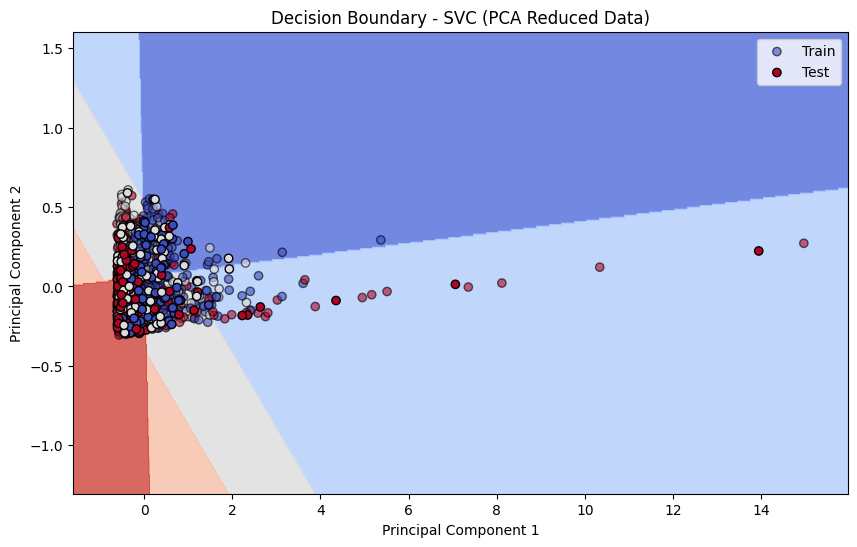

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Perform PCA to reduce features to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Retrain SVC on PCA-reduced data
svc_pca = SVC(random_state=42, kernel='linear', probability=True)
svc_pca.fit(X_train_pca, y_train)

# Predictions
y_pred_svc_pca = svc_pca.predict(X_test_pca)

# Evaluate performance
print("SVC Accuracy (PCA):", accuracy_score(y_test, y_pred_svc_pca))
print("Classification Report (PCA):\n", classification_report(y_test, y_pred_svc_pca))
print("Confusion Matrix (PCA):\n", confusion_matrix(y_test, y_pred_svc_pca))

# Plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svc_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 0].reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# Convert categorical labels to numerical for color mapping
from pandas.api import types
# Check if y_train is categorical to begin with
if types.is_categorical_dtype(y_train):
    # If already categorical, use codes
    y_train_num = y_train.cat.codes
else:
    # Convert to categorical if needed and extract codes
    y_train_num = pd.Categorical(y_train).codes

# Similar handling for y_test:
if types.is_categorical_dtype(y_test):
    y_test_num = y_test.cat.codes
else:
    y_test_num = pd.Categorical(y_test).codes

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_num, edgecolor='k', cmap='coolwarm', alpha=0.6, label='Train')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_num, edgecolor='k', cmap='coolwarm', label='Test')
plt.title("Decision Boundary - SVC (PCA Reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

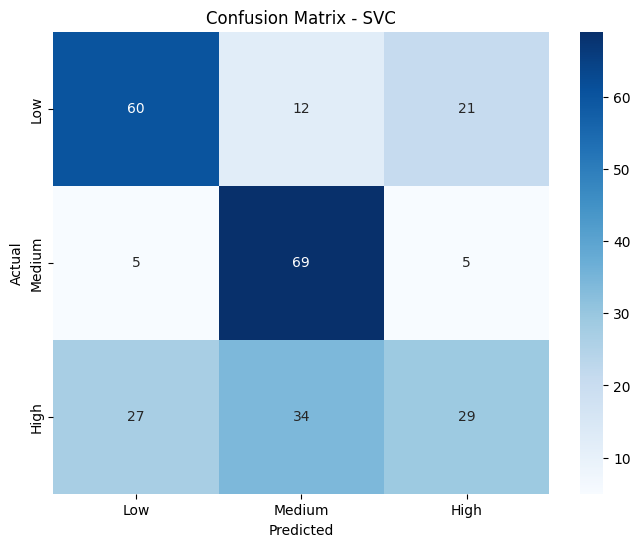

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=bin_labels, yticklabels=bin_labels)
plt.title("Confusion Matrix - SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


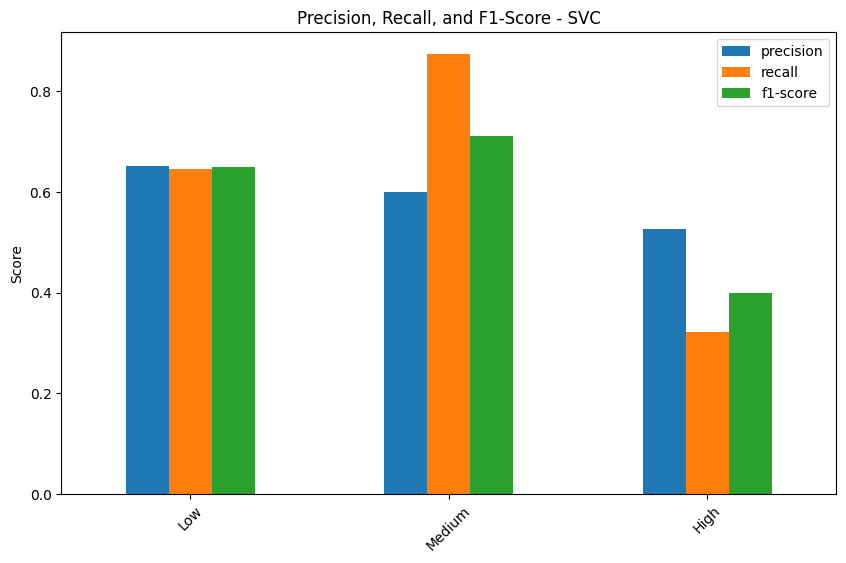

In [32]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report_svc = classification_report(y_test, y_pred_svc, target_names=bin_labels, output_dict=True)
report_df = pd.DataFrame(report_svc).transpose()

# Visualize precision, recall, and F1-score
report_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, and F1-Score - SVC")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN Classifier model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate performance
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.6412213740458015
Classification Report:
               precision    recall  f1-score   support

        High       0.67      0.68      0.67        93
         Low       0.64      0.89      0.74        79
      Medium       0.59      0.39      0.47        90

    accuracy                           0.64       262
   macro avg       0.64      0.65      0.63       262
weighted avg       0.64      0.64      0.63       262

Confusion Matrix:
 [[63 10 20]
 [ 5 70  4]
 [26 29 35]]


###Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Train the model
dt.fit(X_train, y_train)
# Predict on the test data
y_pred_dt = dt.predict(X_test)


Decision Tree Accuracy: 0.64

Classification Report:
              precision    recall  f1-score   support

         Low       0.64      0.65      0.64        93
      Medium       0.70      0.77      0.73        79
        High       0.58      0.52      0.55        90

    accuracy                           0.64       262
   macro avg       0.64      0.65      0.64       262
weighted avg       0.64      0.64      0.64       262



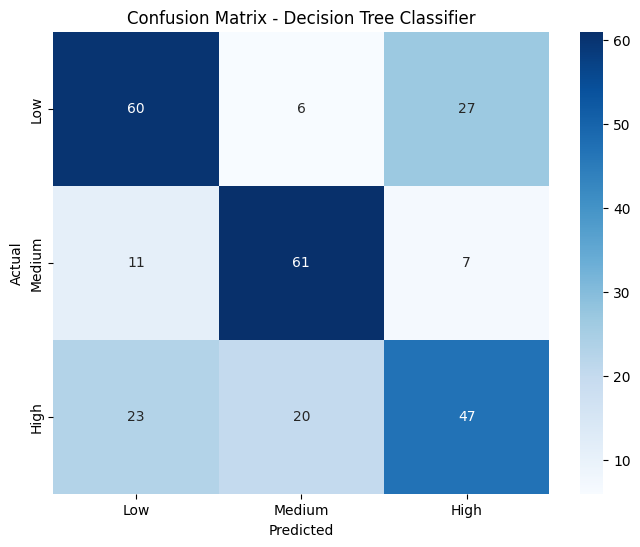

In [35]:
# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=bin_labels))

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='g', cmap='Blues', xticklabels=bin_labels, yticklabels=bin_labels)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


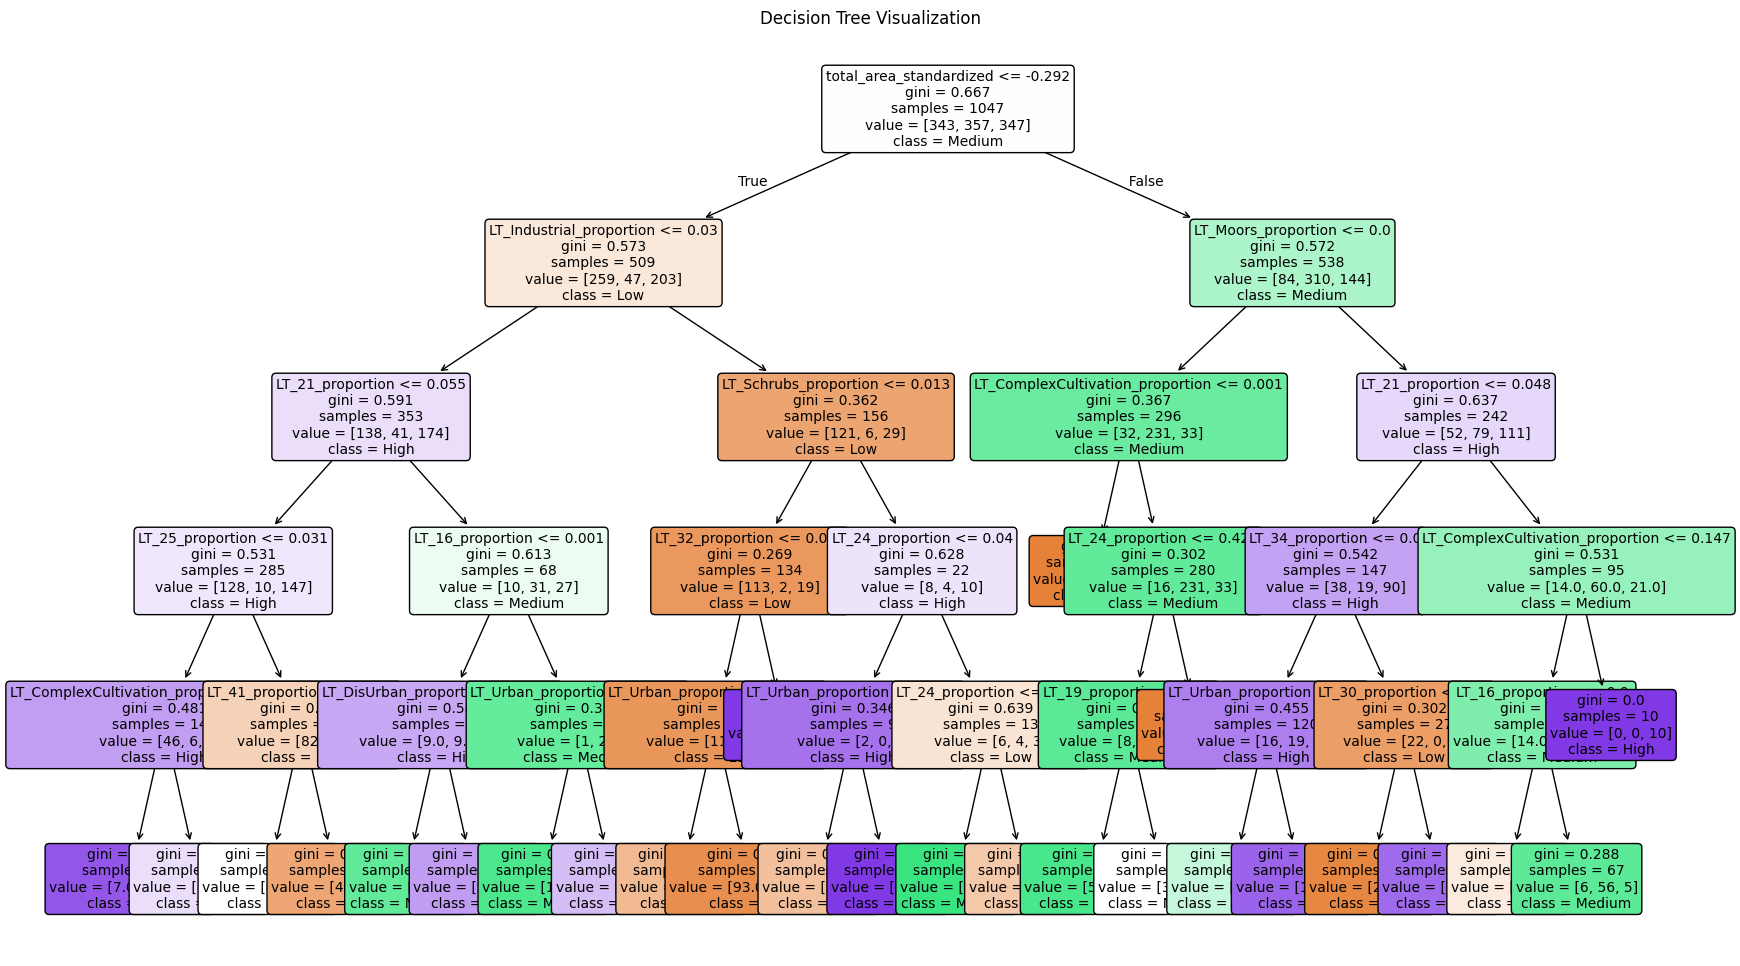

In [36]:
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20, 12))
plot_tree(dt, feature_names=X_train.columns, class_names=bin_labels, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


### Analysis

In [37]:
from sklearn.metrics import accuracy_score

# Logistic Regression accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Random Forest accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Support Vector Classifier accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# K-Nearest Neighbors accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)


# Print all accuracies
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"SVC Accuracy: {accuracy_svc}")
print(f"KNN Accuracy: {accuracy_knn}")


Logistic Regression Accuracy: 0.5687022900763359
Random Forest Accuracy: 0.767175572519084
SVC Accuracy: 0.6030534351145038
KNN Accuracy: 0.6412213740458015


In [38]:
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Train the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),  # Set probability=True to use predicted probabilities
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

log_losses = {}  # Fixed: Removed extra indentation

# Train each model and calculate the log loss
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)  # Get predicted probabilities
    loss = log_loss(y_test, y_pred_prob)
    log_losses[model_name] = loss

    # Print log loss comparison
print("Log Loss Comparison:")  # Moved outside the loop to print only once
for model_name, loss in log_losses.items():
    print(f"{model_name}: {loss:.4f}")

Log Loss Comparison:
Random Forest: 0.5985
SVC: 0.8321
Decision Tree: 13.3444
Logistic Regression: 0.8583


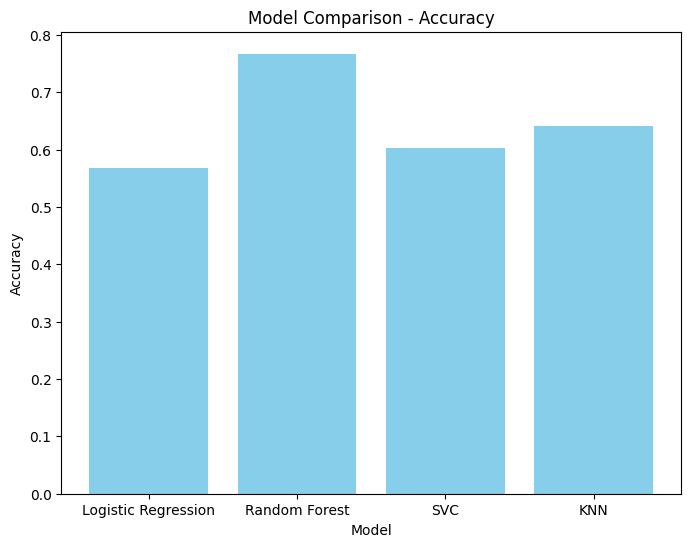

In [39]:
# Assuming you have a dictionary of model names and their respective accuracies
models = ['Logistic Regression', 'Random Forest', 'SVC', 'KNN']
accuracies = [accuracy_logreg, accuracy_rf, accuracy_svc, accuracy_knn]

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color='skyblue')
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

## Regression

In [40]:
from sklearn.model_selection import train_test_split

# Features
X = data.drop(columns=['OBS_VALUE'])

# target
y = data['OBS_VALUE']


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (916, 46), Testing set size: (393, 46)


### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

Eval:

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 9729.95355476505
Mean Squared Error (MSE): 252624199.8583039
R-squared (R²): 0.23733609551109824


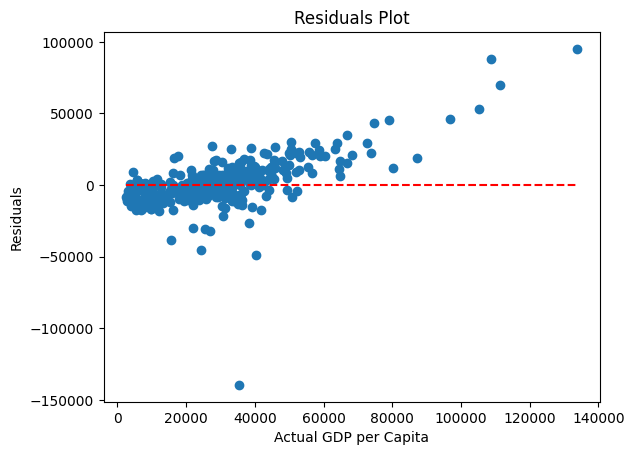

In [43]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
import matplotlib.pyplot as plt
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='r', linestyles='--')
plt.xlabel('Actual GDP per Capita')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

LR has very poor performance, residual plot shows model can not capture data well.

### Random Forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R²: {r2_rf}")

Random Forest - MAE: 7073.737913486005, MSE: 135873817.18829516, R²: 0.5898015471488481


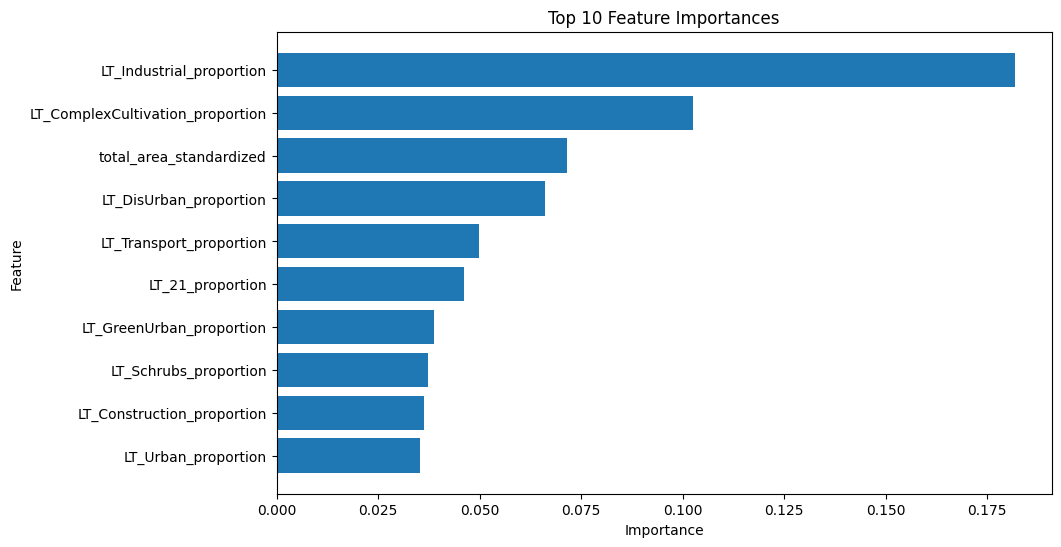

In [45]:
# Feature importance for Random Forest
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10))
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2'
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_rf_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using the best model from GridSearchCV
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model's performance
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Print the results
print(f"Best Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_best_rf}")
print(f"Mean Squared Error (MSE): {mse_best_rf}")
print(f"R-squared (R²): {r2_best_rf}")


Best Random Forest Model Performance:
Mean Absolute Error (MAE): 7223.206663899351
Mean Squared Error (MSE): 147687091.51637107
R-squared (R²): 0.5541376719979232


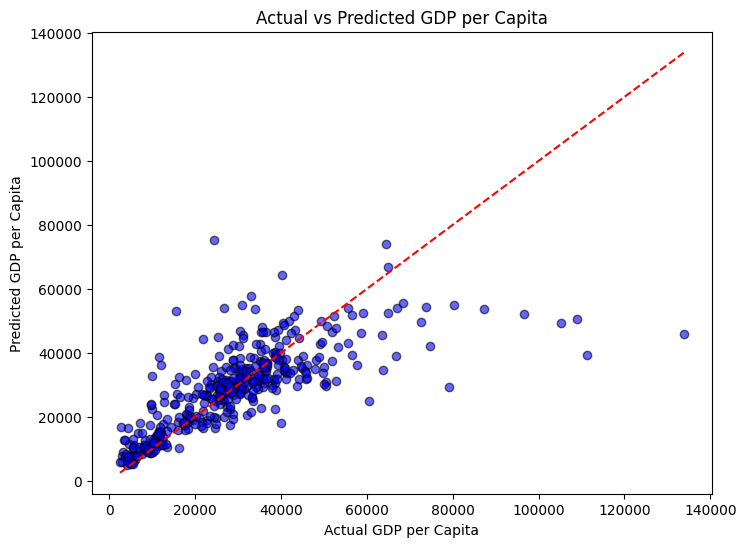

In [48]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_rf, color='blue', edgecolors='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual GDP per Capita')
plt.ylabel('Predicted GDP per Capita')
plt.title('Actual vs Predicted GDP per Capita')
plt.show()

## Clustering

In [49]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select features for clustering
features_for_clustering = data[[col for col in data.columns]]

# Normalize the data
scaled_data = scaler.fit_transform(features_for_clustering)

In [50]:
print(list(features_for_clustering.columns))

['OBS_VALUE', 'LT_Urban_proportion', 'LT_DisUrban_proportion', 'LT_Industrial_proportion', 'LT_Transport_proportion', 'LT_Ports_proportion', 'LT_Airports_proportion', 'LT_7_proportion', 'LT_8_proportion', 'LT_Construction_proportion', 'LT_GreenUrban_proportion', 'LT_SportsLeisure_proportion', 'LT_12_proportion', 'LT_13_proportion', 'LT_14_proportion', 'LT_15_proportion', 'LT_16_proportion', 'LT_17_proportion', 'LT_18_proportion', 'LT_19_proportion', 'LT_ComplexCultivation_proportion', 'LT_21_proportion', 'LT_22_proportion', 'LT_23_proportion', 'LT_24_proportion', 'LT_25_proportion', 'LT_26_proportion', 'LT_Moors_proportion', 'LT_28_proportion', 'LT_Schrubs_proportion', 'LT_30_proportion', 'LT_31_proportion', 'LT_32_proportion', 'LT_33_proportion', 'LT_34_proportion', 'LT_35_proportion', 'LT_36_proportion', 'LT_37_proportion', 'LT_38_proportion', 'LT_39_proportion', 'LT_40_proportion', 'LT_41_proportion', 'LT_42_proportion', 'LT_43_proportion', 'LT_44_proportion', 'LT_48_proportion', 't

### K Means

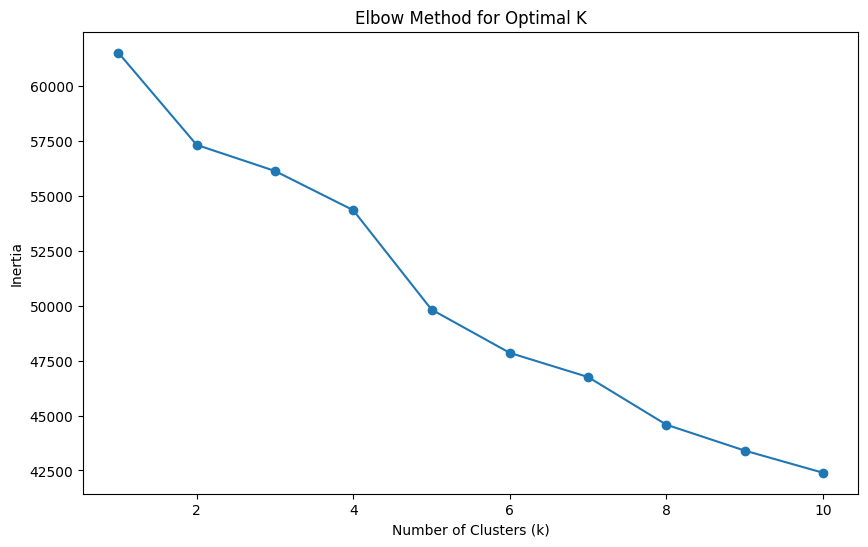

K-Means Clustering result:
cluster
1    796
3    353
4     93
0     64
2      3
Name: count, dtype: int64


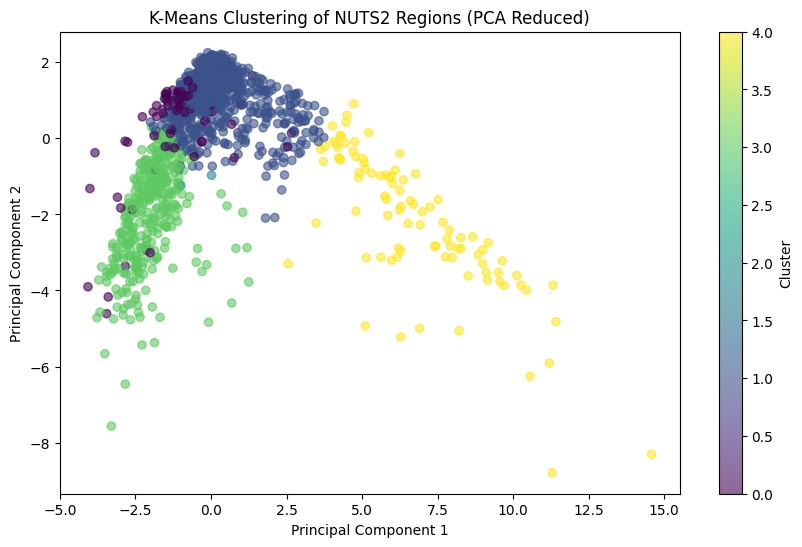

In [54]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Determine optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# From the elbow plot, choose the optimal number of clusters (e.g., 4 clusters)
optimal_k = 5

# Initialize KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Display cluster information
print("K-Means Clustering result:")
print(data['cluster'].value_counts())

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Visualize clusters in the 2D PCA space
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering of NUTS2 Regions (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


### Hierarchical

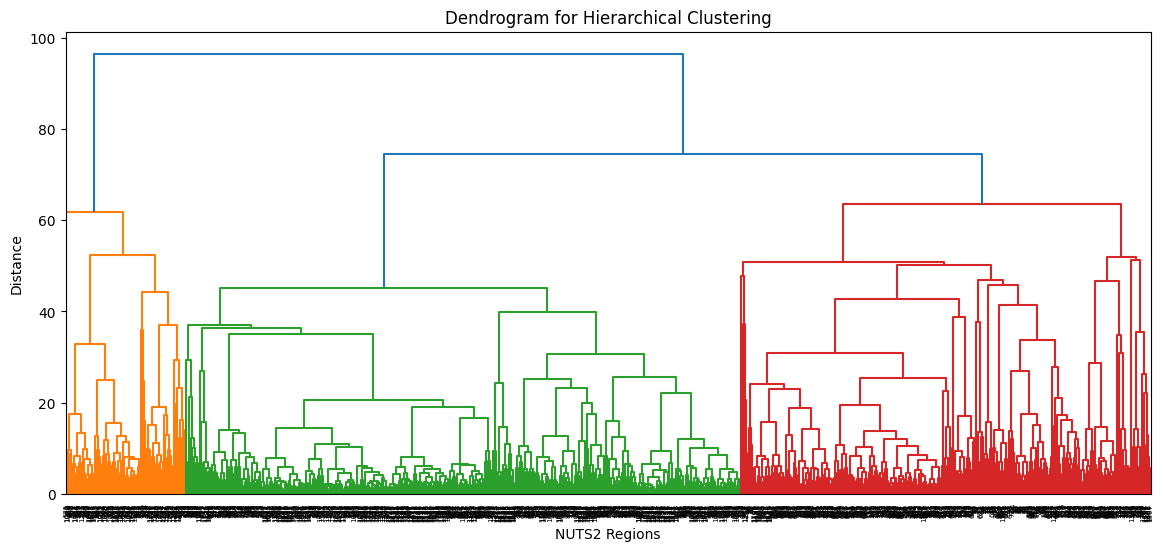

Hierarchical Clustering result:
hierarchical_cluster
4    669
5    410
1     90
6     85
2     54
3      1
Name: count, dtype: int64


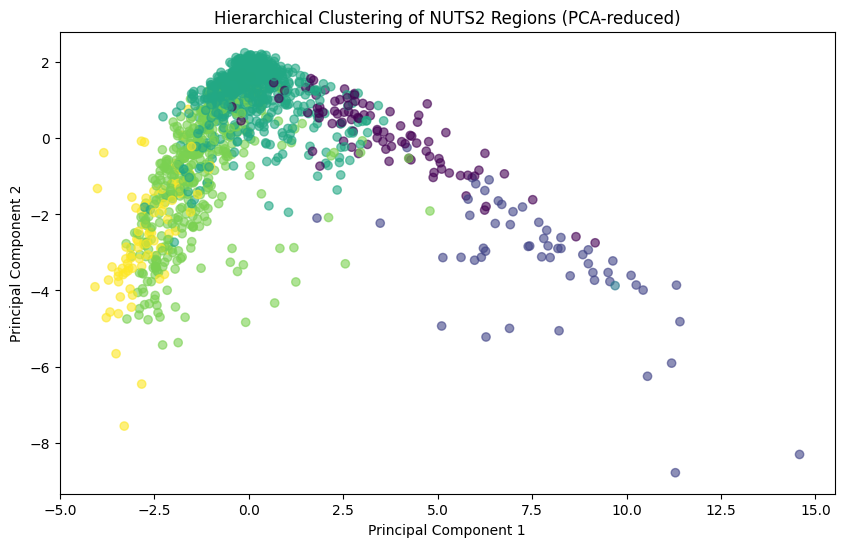

In [52]:
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Perform hierarchical clustering using the 'ward' linkage method
linked = linkage(scaled_data, method='ward')

# Plot dendrogram to determine optimal number of clusters
plt.figure(figsize=(14, 6))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('NUTS2 Regions')
plt.ylabel('Distance')
plt.show()

num_clusters = 6 # based on dendogram

# Form flat clusters from hierarchical clustering
data['hierarchical_cluster'] = fcluster(linked, num_clusters, criterion='maxclust')

# Display cluster information
print("Hierarchical Clustering result:")
print(data['hierarchical_cluster'].value_counts())

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Visualize hierarchical clustering on PCA-reduced data
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['hierarchical_cluster'], cmap='viridis', alpha=0.6)
plt.title('Hierarchical Clustering of NUTS2 Regions (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Correlation Analysis

Top correlations with OBS_VALUE:
OBS_VALUE                           1.000000
LT_Industrial_proportion            0.466329
LT_DisUrban_proportion              0.461619
LT_SportsLeisure_proportion         0.361668
LT_GreenUrban_proportion            0.339672
LT_Transport_proportion             0.335119
LT_Airports_proportion              0.207774
LT_Ports_proportion                 0.197081
LT_Urban_proportion                 0.187985
LT_18_proportion                    0.179319
LT_24_proportion                    0.112538
LT_8_proportion                     0.103447
LT_25_proportion                    0.047374
LT_Construction_proportion          0.030137
LT_14_proportion                   -0.019096
LT_15_proportion                   -0.029700
LT_7_proportion                    -0.031549
LT_12_proportion                   -0.042066
LT_22_proportion                   -0.048676
LT_19_proportion                   -0.077304
LT_16_proportion                   -0.103499
LT_17_proportion      

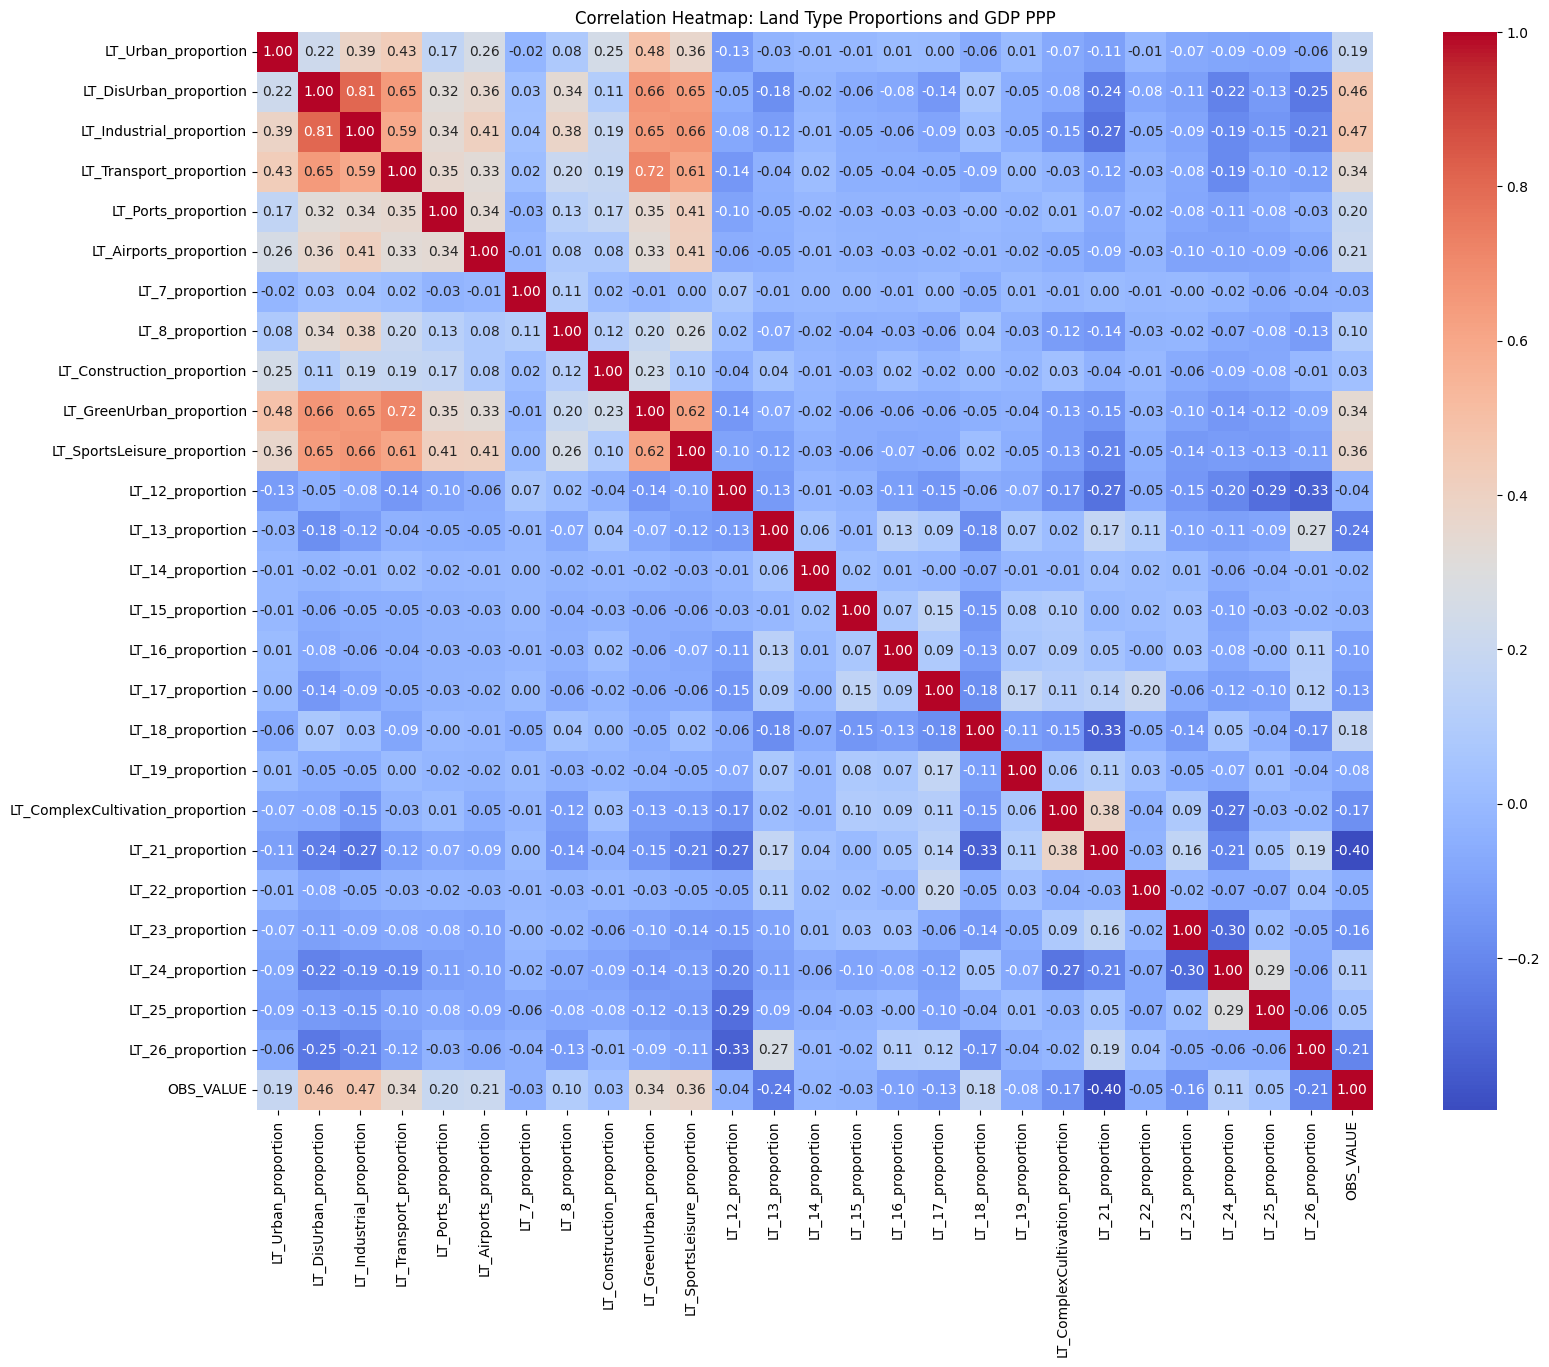

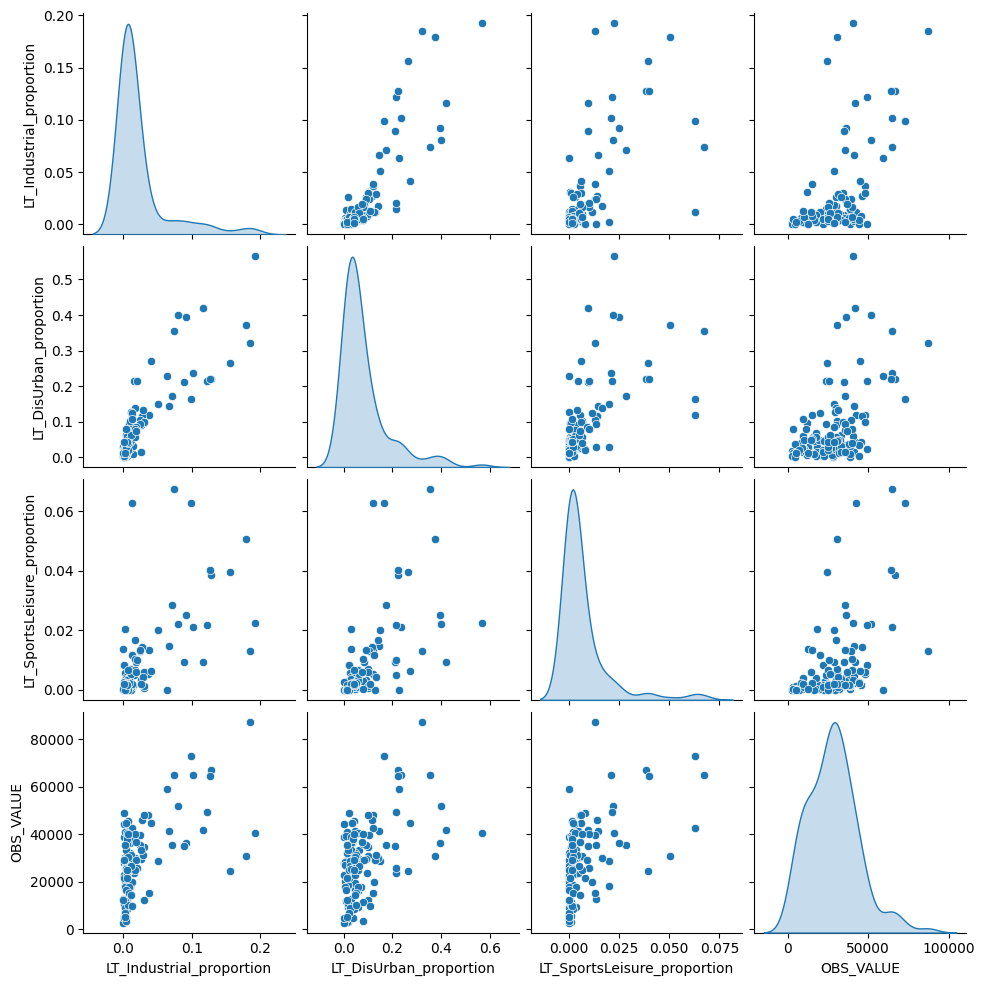

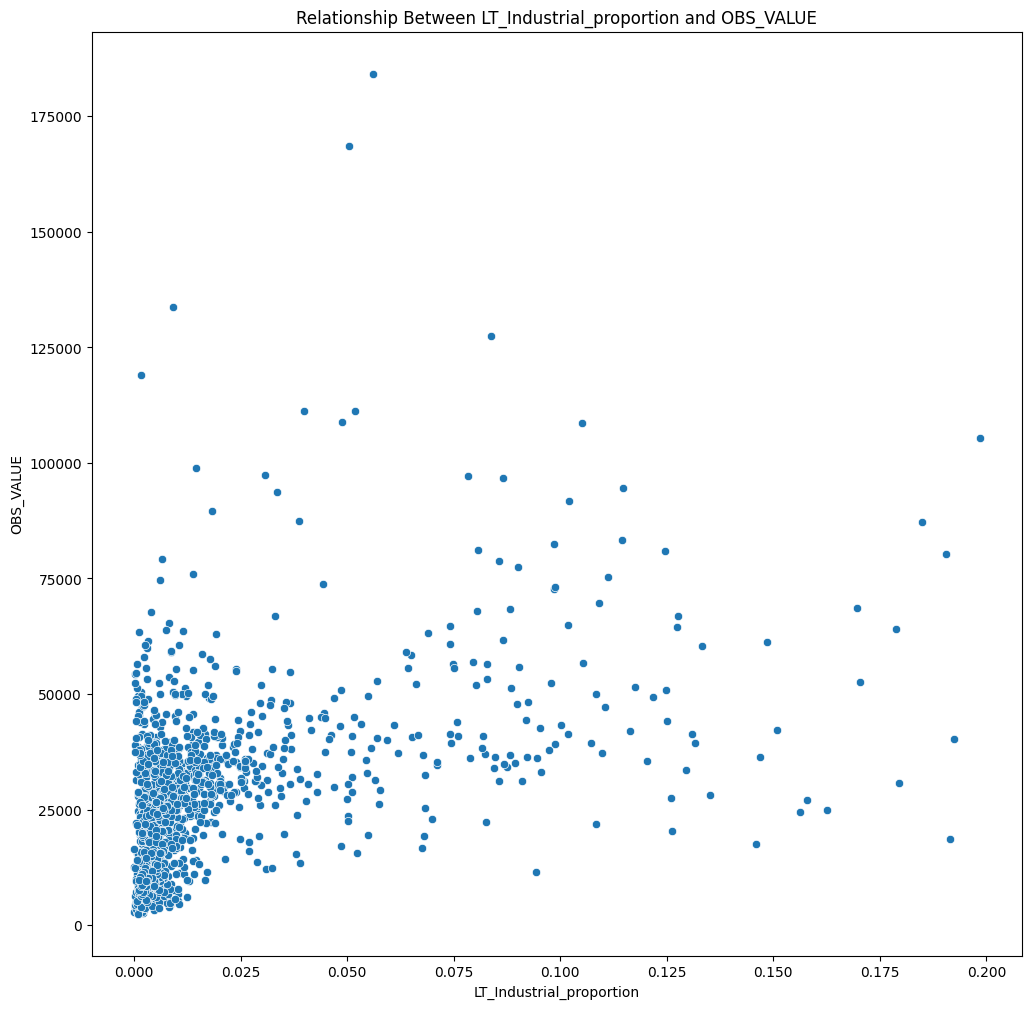

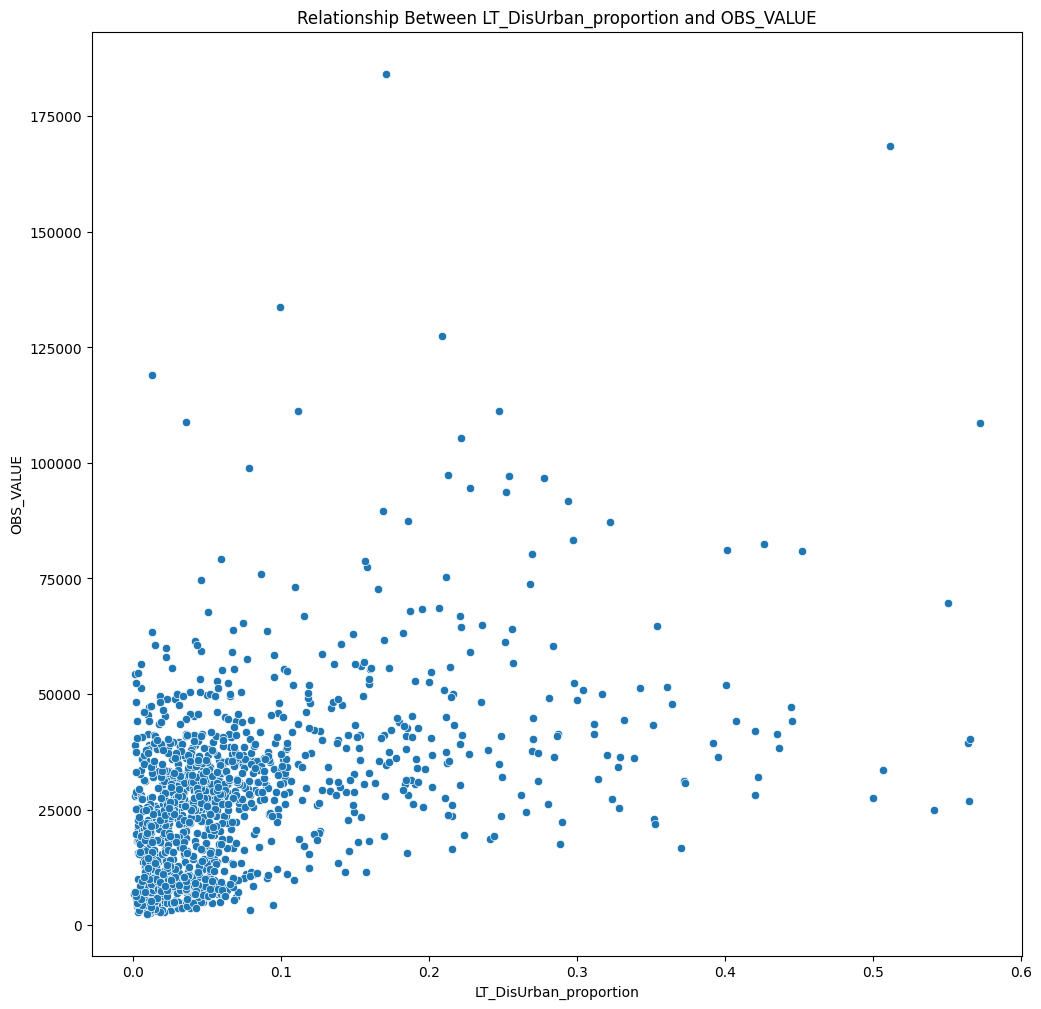

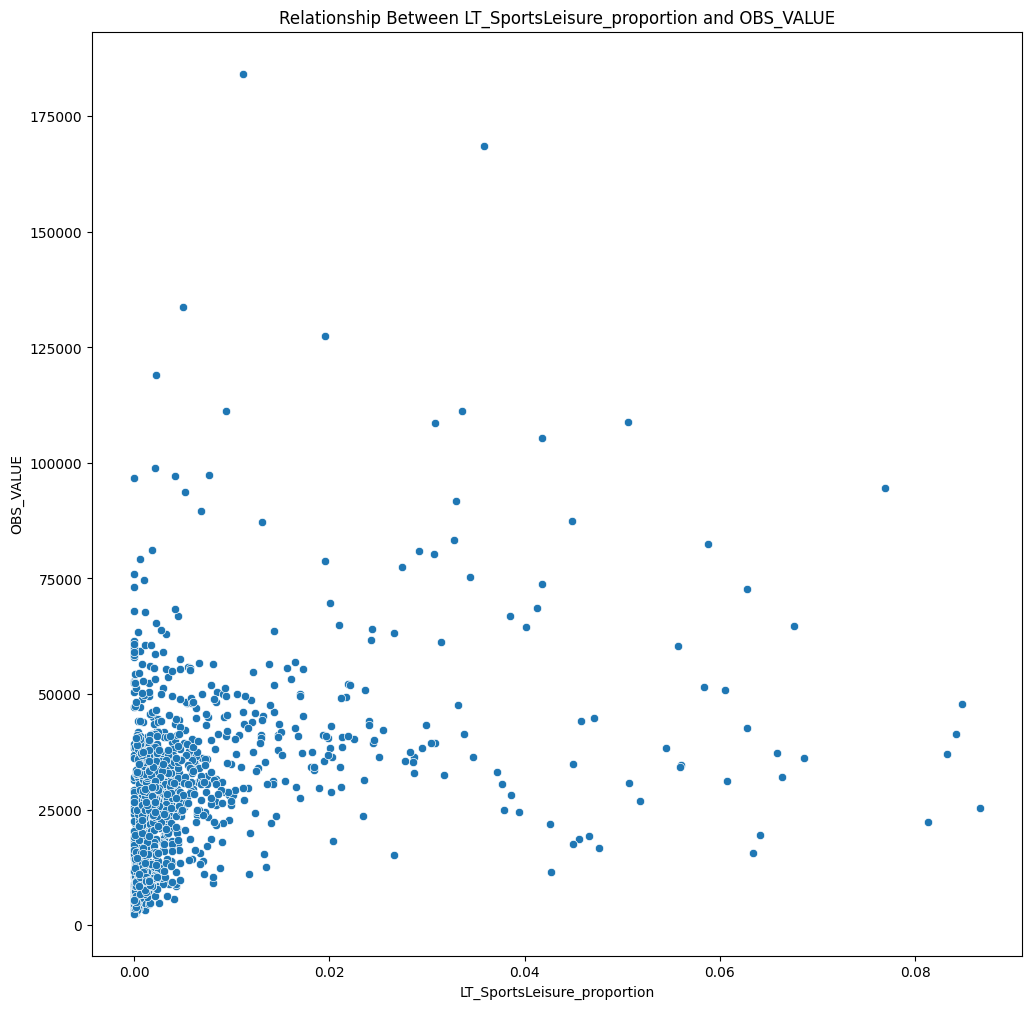

Average OBS_VALUE by quartile of LT_Industrial_proportion:
 LT_Industrial_proportion
(-0.001, 0.00307]     17690.853659
(0.00307, 0.00689]    21971.865443
(0.00689, 0.0161]     28629.663609
(0.0161, 0.198]       42430.581040
Name: OBS_VALUE, dtype: float64
Average OBS_VALUE by quartile of LT_DisUrban_proportion:
 LT_DisUrban_proportion
(-0.00013500000000000003, 0.0216]    18560.060976
(0.0216, 0.0447]                     22829.969419
(0.0447, 0.0797]                     27540.061162
(0.0797, 0.572]                      41790.214067
Name: OBS_VALUE, dtype: float64
Average OBS_VALUE by quartile of LT_SportsLeisure_proportion:
 LT_SportsLeisure_proportion
(-0.001, 0.000505]     17393.292683
(0.000505, 0.00174]    23666.972477
(0.00174, 0.00467]     28885.321101
(0.00467, 0.0866]      40778.287462
Name: OBS_VALUE, dtype: float64


<ipython-input-53-e5ebf783c46b>:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(pd.qcut(data[histo], q=4, duplicates='drop'))['OBS_VALUE'].mean()
<ipython-input-53-e5ebf783c46b>:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(pd.qcut(data[histo], q=4, duplicates='drop'))['OBS_VALUE'].mean()
<ipython-input-53-e5ebf783c46b>:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data3 = data.copy()
# Extract HISTO columns and OBS_VALUE
histo_columns = [col for col in data3.columns if col.startswith("LT_")][:26]

# Ensure OBS_VALUE is numeric for analysis
data3['OBS_VALUE'] = pd.to_numeric(data3['OBS_VALUE'], errors='coerce')

# Drop rows with missing OBS_VALUE or HISTO values
data = data.dropna(subset=['OBS_VALUE'] + histo_columns)

# Calculate correlations
correlations = data[['OBS_VALUE']+histo_columns].corr()['OBS_VALUE'].sort_values(ascending=False)

# Display top correlated HISTO columns
print("Top correlations with OBS_VALUE:")
print(correlations)

# Visualize correlations using a heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(data[histo_columns + ['OBS_VALUE']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap: Land Type Proportions and GDP PPP")
plt.show()

# Limit to the top 3 correlated HISTO columns
top_histo = correlations[1:4].index.tolist()  # Top 3 excluding OBS_VALUE

# Sample 10% of the data for faster visualization
data_sample = data.sample(frac=0.1, random_state=42)

# Pairplot with reduced variables and sampled data
sns.pairplot(data=data_sample, vars=top_histo + ['OBS_VALUE'], diag_kind="kde")
plt.show()

# Scatterplots for top correlated HISTO columns
for histo in top_histo:
    plt.figure(figsize=(12, 12))
    sns.scatterplot(x=data[histo], y=data['OBS_VALUE'])
    plt.title(f"Relationship Between {histo} and OBS_VALUE")
    plt.xlabel(histo)
    plt.ylabel("OBS_VALUE")
    plt.show()

# Additional insights: Summary statistics
for histo in top_histo:
    try:
        grouped = data.groupby(pd.qcut(data[histo], q=4, duplicates='drop'))['OBS_VALUE'].mean()
        print(f"Average OBS_VALUE by quartile of {histo}:\n", grouped)
    except ValueError as e:
        print(f"Skipping {histo} due to error: {e}")